In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
#this will allow the plot to be inline in the browser
%matplotlib inline

In [3]:
cities = ['Barcelona','Berlin','BostonSouth','NYCLIRR','LosAngeles','Madrid','Milan','Mumbai','Munich','Oslo','Paris','Philadelphia','RioDeJaneiro','Sydney','Toronto']
rail_netwks = []
node_num = []
for city in cities:
    fp = r'/Users/Ian/Documents/Berkeley/CY290/commuter_rail/network_files/' + city +'.net' # file path
    CR = nx.read_pajek(fp)
    CR = max(nx.connected_component_subgraphs(CR), key=len)
    rail_netwks.append(CR)
    node_num.append(CR.number_of_nodes())

In [38]:
node_num

[317, 165, 78, 122, 61, 92, 125, 111, 149, 171, 237, 156, 102, 178, 66]

In [39]:
def fromMulti_to_Single(G):
    H = nx.Graph()
    for u,v,d in G.edges(data=True):
        H.add_edge(u,v)
    return H

I=np.argsort(node_num)

In [40]:
I

array([ 4, 14,  2,  5, 12,  7,  3,  6,  8, 11,  1,  9, 13, 10,  0], dtype=int64)

In [54]:
rail_netwks

In [76]:
pathlength=[]
clustering=[]
k = []
node_num=[]
names=[]

#for city,CR in zip(cities, rail_netwks):
for i in I:
    names.append(cities[i])
    CR = rail_netwks[i]
    CR=fromMulti_to_Single(CR)
    clustering.append(nx.average_clustering(CR))
    node_num.append(nx.number_of_nodes(CR))
    pathlength.append(nx.average_shortest_path_length(CR))
    k.append(np.mean(dict(nx.degree(CR)).values()))

In [77]:
#RG approximations
rgpath=[]
rgcc=[]

for i in range(0,len(names)):
    rgpath.append(np.log(node_num[i])/np.log(k[i]))
    rgcc.append(k[i]/node_num[i])

In [86]:
for i in range(0,len(names)):
    print names[i], ", # Nodes:", node_num[i], ", <k> ", k[i], ", <l> ", pathlength[i], ", Avg CC ", clustering[i]
    print "RG analytical approximation <l>= ", rgpath[i], ", RG analytical approximation CC=", rgcc[i]
    print "\n"

LosAngeles , # Nodes: 61 , <k>  2.06557377049 , <l>  9.45300546448 , Avg CC  0.0
RG analytical approximation <l>=  5.66698137014 , RG analytical approximation CC= 0.03386186509


Toronto , # Nodes: 66 , <k>  1.9696969697 , <l>  9.87319347319 , Avg CC  0.0
RG analytical approximation <l>=  6.18052832963 , RG analytical approximation CC= 0.0298438934803


BostonSouth , # Nodes: 78 , <k>  2.0 , <l>  11.1731601732 , Avg CC  0.0
RG analytical approximation <l>=  6.28540221886 , RG analytical approximation CC= 0.025641025641


Madrid , # Nodes: 92 , <k>  2.0652173913 , <l>  11.2286192069 , Avg CC  0.0108695652174
RG analytical approximation <l>=  6.234924528 , RG analytical approximation CC= 0.0224480151229


RioDeJaneiro , # Nodes: 102 , <k>  2.05882352941 , <l>  17.7652882935 , Avg CC  0.0228758169935
RG analytical approximation <l>=  6.40458449321 , RG analytical approximation CC= 0.020184544406


Mumbai , # Nodes: 111 , <k>  2.36036036036 , <l>  8.08746928747 , Avg CC  0.0456456456456
RG

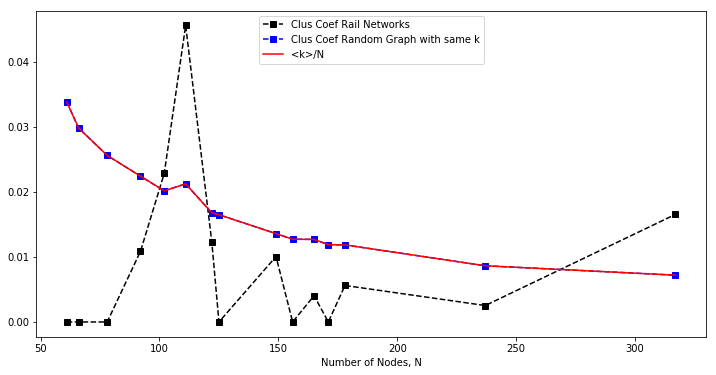

In [91]:
plt.figure(1,figsize=(12,6))

plt.plot(node_num,clustering,'--ks',label='Clus Coef Rail Networks')
plt.plot(node_num,rgcc,'--bs',label='Clus Coef Random Graph with same k')
plt.plot(node_num,np.squeeze(k) / np.squeeze(node_num),'-r',label='<k>/N')
plt.legend(loc='upper center')
plt.xlabel("Number of Nodes, N")
plt.show()

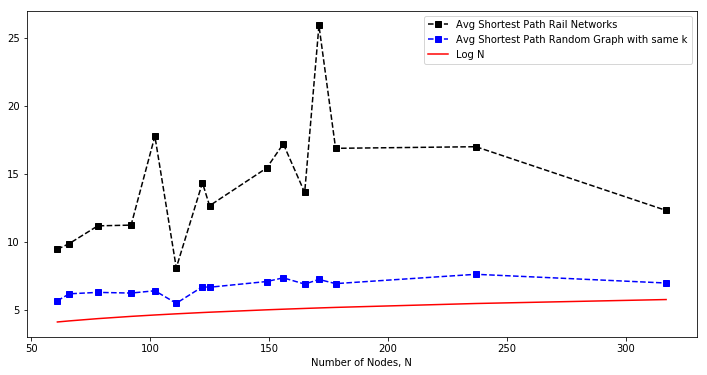

In [94]:
plt.figure(2,figsize=(12,6))

plt.plot(node_num,pathlength,'--ks',label='Avg Shortest Path Rail Networks')
plt.plot(node_num,rgpath,'--bs',label='Avg Shortest Path Random Graph with same k')
plt.plot(node_num,np.log(node_num),'-r',label='Log N')
plt.legend(loc='upper right')
plt.xlabel("Number of Nodes, N")
plt.show()

In [116]:
psw=0.5
swcc = []
swpath = []
for i in range(0,len(node_num)):
    print names[i]," ",int(round(k[i]))," ",node_num[i]
    sw=nx.watts_strogatz_graph(node_num[i],int(round(k[i])),psw)
    SW=max(nx.connected_component_subgraphs(sw), key=len)
    swcc.append(nx.average_clustering(SW))
    swpath.append(nx.average_shortest_path_length(SW))

LosAngeles   2   61
Toronto   2   66
BostonSouth   2   78
Madrid   2   92
RioDeJaneiro   2   102
Mumbai   2   111
NYCLIRR   2   122
Milan   2   125
Munich   2   149
Philadelphia   2   156
Berlin   2   165
Oslo   2   171
Sydney   2   178
Paris   2   237
Barcelona   2   317


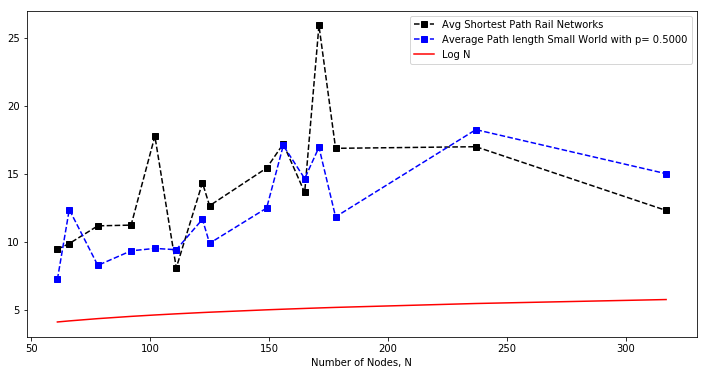

In [117]:
plt.figure(2,figsize=(12,6))

plt.plot(node_num,pathlength,'--ks',label='Avg Shortest Path Rail Networks')
plt.plot(node_num,swpath,'--bs',label='Average Path length Small World with p= %.4f'%(psw))
plt.plot(node_num,np.log(node_num),'-r',label='Log N')
plt.legend(loc='upper right')
plt.xlabel("Number of Nodes, N")
plt.show()

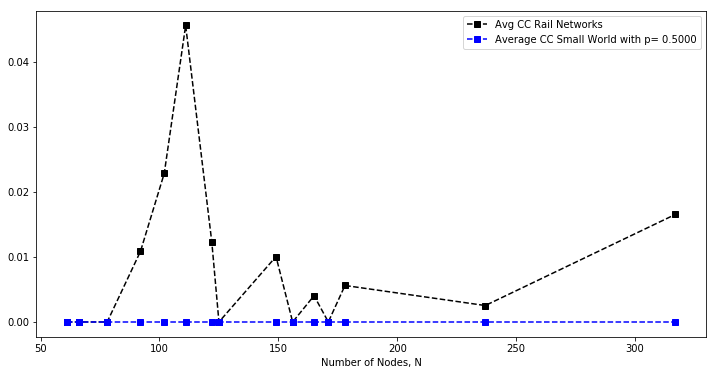

In [124]:
plt.figure(2,figsize=(12,6))

plt.plot(node_num,clustering,'--ks',label='Avg CC Rail Networks')
plt.plot(node_num,swcc,'--bs',label='Average CC Small World with p= %.4f'%(psw))
plt.legend(loc='upper right')
plt.xlabel("Number of Nodes, N")
plt.show()

In [26]:
print "Average Number of Nodes:", np.mean(node_num)
print "Average of all Shortest Paths: ", np.mean(pathlength)
print "Average of all CCs ", np.mean(clustering)
print "Average of all Degrees ", np.mean(k)

Average Number of Nodes: 142.0
Average of all Shortest Paths:  14.1919970133
Average of all CCs  0.00870065150079
Average of all Degrees  2.0817226016


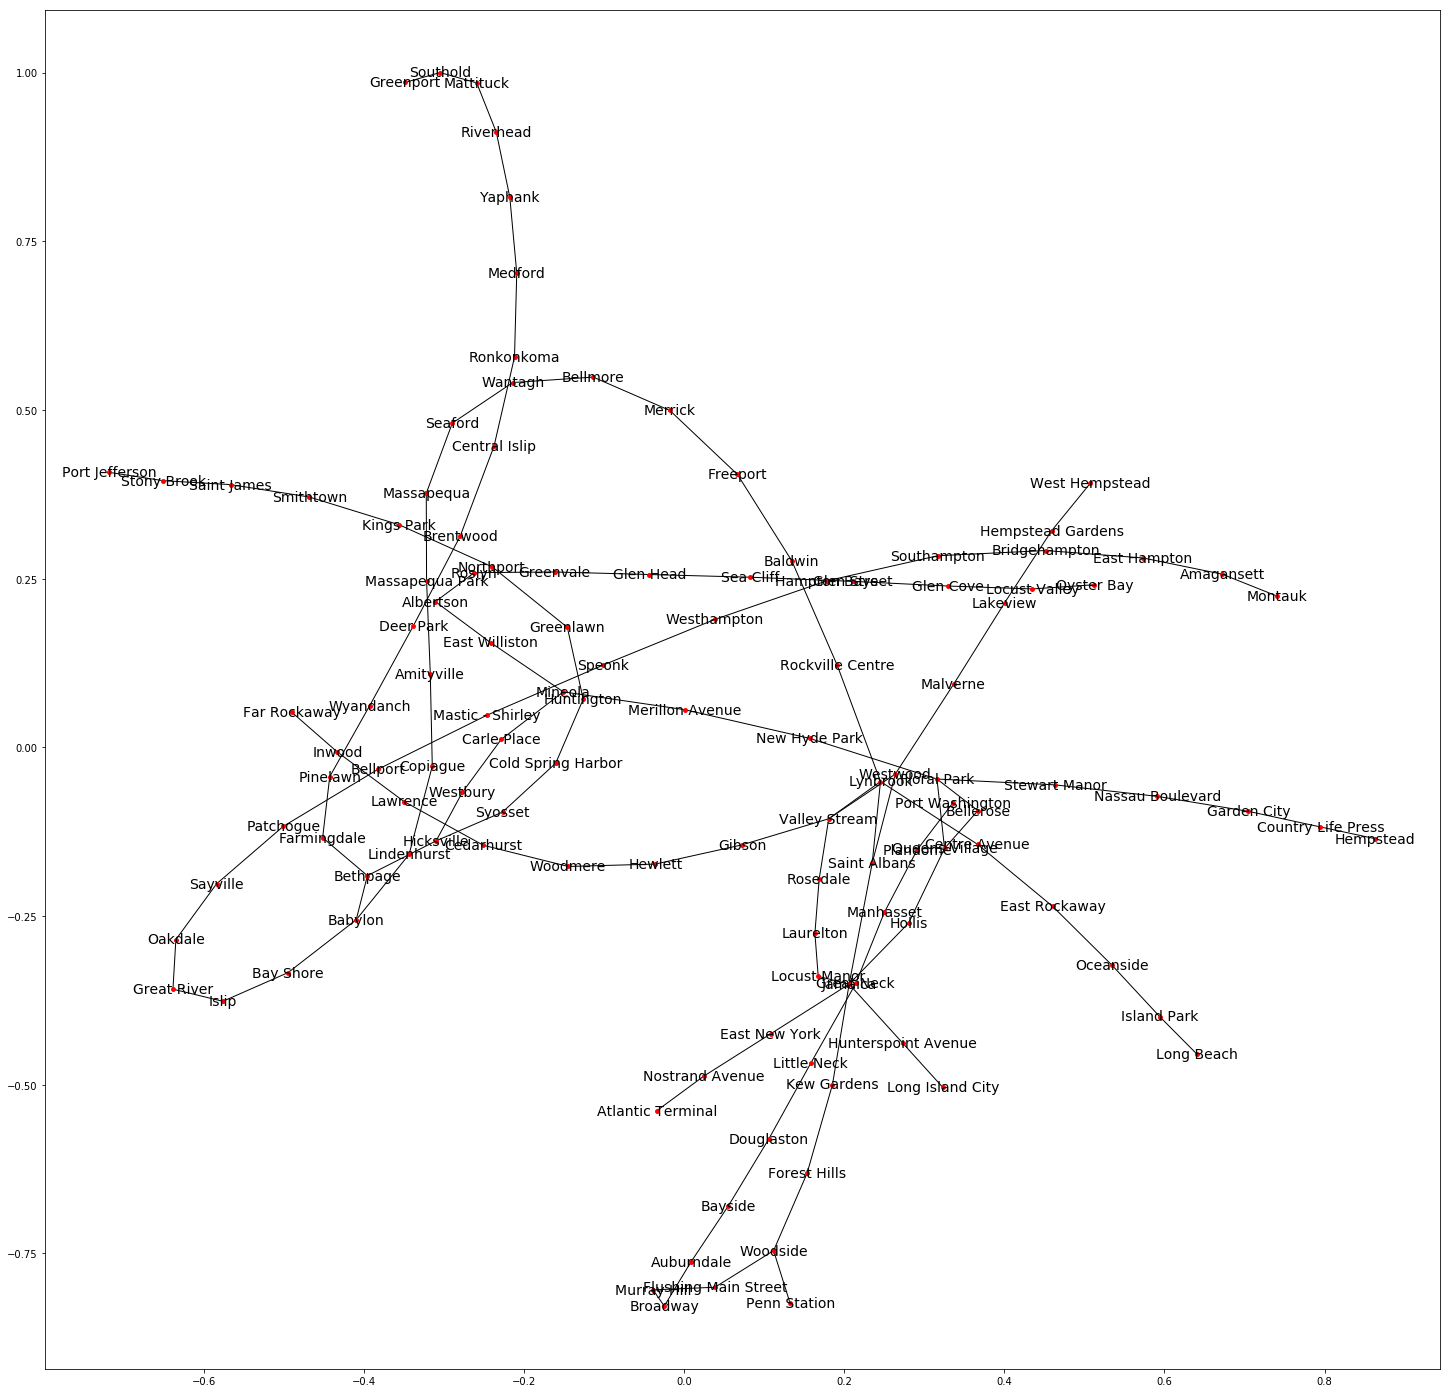

In [8]:
C1 = rail_netwks[3]

plt.figure(1,figsize=(25,25))
nx.draw_networkx(C1,node_size=15,font_size=14)